In [70]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import History
import warnings
warnings.filterwarnings("ignore")


In [71]:
# Weights
# Bias
# Input Layers
# hidden Layers --> Neurons
# Forward Propagation
# Activation functions  : Sigmoid, RELU, SOFTMAX
# Loss fn/ cost fn
# Optimizers   : GD, SGD, Momentum, ADAGRAD, ADADELTA, ADAM, RMS Prop
# Back-propagation
# Weights adjustments (chain rule of differentiation)
 

In [72]:
# Loss functions : 
# MSE : sum(yi-e(y))2
# Binary Cross-entropy : -y*(log(y^)-(1-y)*log(1-y^))
# Multi-class cross entropy : -yij*log(yij^)
# Activation functions
# RELU : max(o,x)

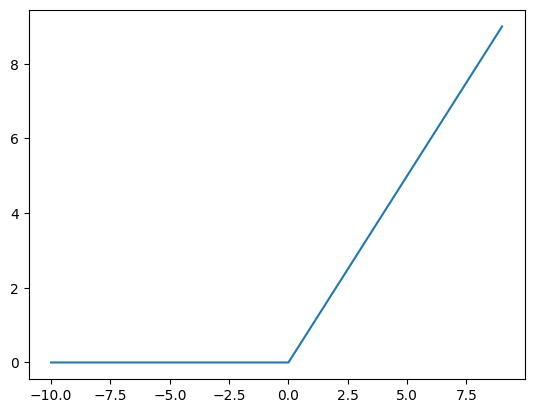

In [73]:
from matplotlib import pyplot as plt
def relu_ex(x):
    return max(0.0,x)

inp = [i for i in range(-10,10)]
op = [relu_ex(i) for i in inp]
plt.plot(inp,op)
plt.show()

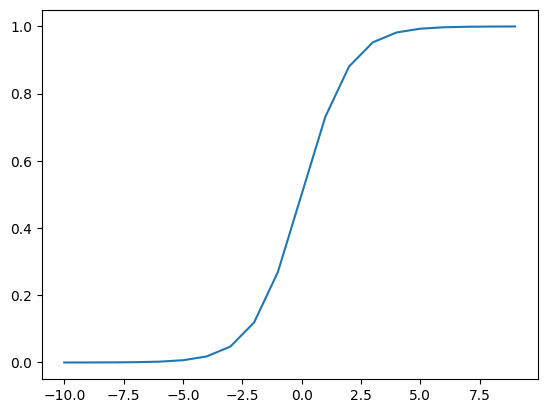

In [74]:
# Sigmoid : 1/1+exp(-z)

from math import exp

def sigmoid_ex(x):
    return 1.0/(1.0+exp(-x))
op_sig = [sigmoid_ex(i) for i in inp]
plt.plot(inp,op_sig)
plt.show()

In [75]:
# Tanh, Leaky Relu, Parameterised relu, exponential relu, 

# Softmax

def softmax_ex(x):
    y = np.exp(x) 
    y_ = y/y.sum()
    return y_

softmax_ex([0.8,1.2,3.1])

array([0.08021815, 0.11967141, 0.80011044])

In [76]:
# Activation fns for hidden layers : RELU

# Activation fns for output layers

# 1. Binary classifiers : Sigmoid
# 2. Multi-class : Softmax
# 3. Regression  : RELU

# Optimizers :

# Gradient Descent : All the dataset is fed at a time
# Stochastic Gradient Descent : Each record is fed at a time
# Mini batch GD : Pass data by batches of records
# Momentum : Exponential weight average (taking previous learning rate by time steps into consideration)
# Adaptive learning rates : Taking learning rate into consideration
# ADAM : Combination Adaptive learning rates and momentum
# RMS Prop : Root mean squared error

In [77]:
df = pd.read_csv(("../csv/churn.csv"))
x = df.iloc[:,2:12]
y = df['Exited']
x1 = pd.get_dummies(x,columns=['Geography','Gender'], drop_first=True)
x1 = x1.values

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.2, random_state = 2)


In [79]:
y_train = y_train.values
y_test = y_test.values



In [80]:
# Here we scale the data for better performance
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [81]:
# Build the ANN model
model = Sequential()

model.add(Dense(6,activation='relu',kernel_initializer='uniform',input_shape=(x_train_scaled.shape[1],)))# First hidden layer
#model.add(Dropout=0.1)
model.add(Dense(6, activation='relu',kernel_initializer = 'uniform'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid', kernel_initializer = 'uniform'))  # Output layer

In [82]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['precision'])

In [83]:
# Train the model and capture the training history----mini batch gradient descent
history = model.fit(x_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2)


Epoch 1/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5994 - precision: 0.0000e+00 - val_loss: 0.4514 - val_precision: 0.0000e+00
Epoch 2/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4480 - precision: 0.0000e+00 - val_loss: 0.4198 - val_precision: 0.0000e+00
Epoch 3/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4388 - precision: 0.0000e+00 - val_loss: 0.4149 - val_precision: 0.0000e+00
Epoch 4/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4357 - precision: 0.0000e+00 - val_loss: 0.4127 - val_precision: 0.0000e+00
Epoch 5/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4334 - precision: 0.0000e+00 - val_loss: 0.4116 - val_precision: 0.0000e+00
Epoch 6/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4314 - precision: 0.0000e+00 - val_loss: 0.4096 - val_precision: 0.0000e+00
Epoch 7/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4294 - precision: 0.0000e+00 - val_loss: 0.4083 - val_precision: 0.0000e+00
Epoch 8/500
200/200 ━━━━━━━

In [84]:
# Make predictions on the test set
#predictions = model.predict(X_test_scaled)
pred = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [85]:
#predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions
from sklearn.metrics import mean_squared_error
err = np.sqrt(mean_squared_error(y_test, pred))
pd.crosstab(y_test, pred.reshape(1,-1))
x_test_scaled.shape

(2000, 11)

In [86]:
err

np.float64(0.35387789884273985)

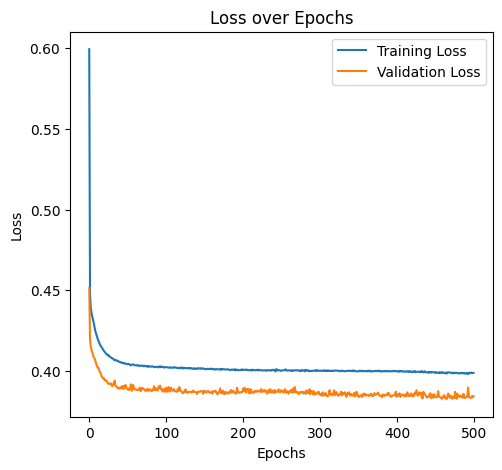

In [87]:
# Plot the training and validation loss
plt.figure(figsize=(12, 5))

# Plot for Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

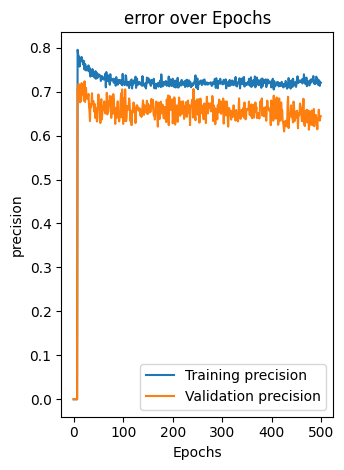

In [88]:
# Plot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['precision'], label='Training precision')
plt.plot(history.history['val_precision'], label='Validation precision')
plt.title('error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('precision')
plt.legend()

plt.tight_layout()
plt.show()

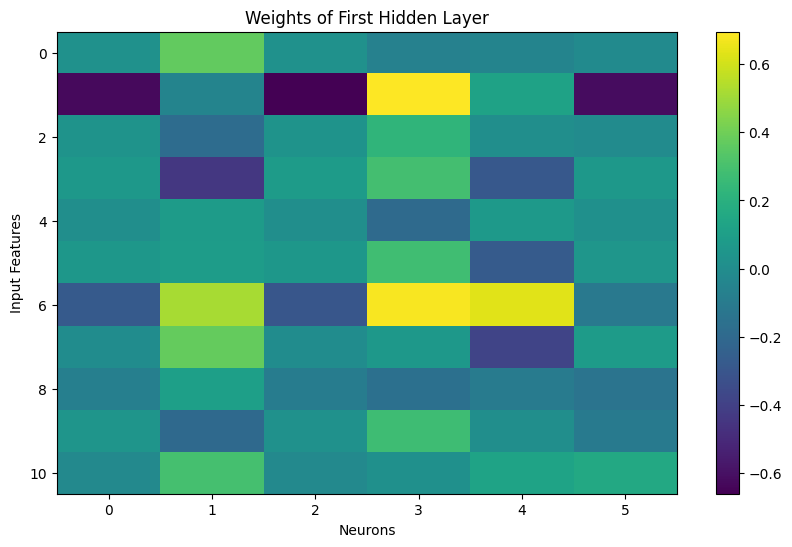

Model training complete and results visualized.


In [89]:

# Visualize the weights of the first hidden layer
weights, biases = model.layers[0].get_weights()
plt.figure(figsize=(10, 6))
plt.imshow(weights, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Weights of First Hidden Layer')
plt.xlabel('Neurons')
plt.ylabel('Input Features')
plt.show()

print("Model training complete and results visualized.")